# Word Embeddings

Word Embdeddings are vector representations of words/tokens in a vocabulary. To put is simply, these are mappings from words to vectors of real numbers. While word embeddings (or distributed representations of words) have a long history, recent advances allowed the training of word embeddings using large unsupervised corpora (like for example Wikipedia). One of the most of the models that had great impact in the domain was [word2vec](https://en.wikipedia.org/wiki/Word2vec). The idea of this model is to scan the documents with a fixed window and create pairs of words that can be used to train a neural model. The intuition is that by capturing the context of word we can learn good representations. For example, if the words `Greece`, `Italy` and `Europe` appear in the same context then we will expect these words to be semantically close in the embedding space.

Another very popular method is GloVe which is a matrix factorization approach trained on the co-occurence matrix. This matrix has the number of times each pair of terms in the collection co-occur (withing a window).

In [1]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np
from umap import UMAP
import seaborn as sns

In [2]:
# read and prepare data
def data_prep(path):
    emmbed_dict = {}
    with open(path,'r', encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:],'float32')
            emmbed_dict[word]=vector
            
    return emmbed_dict

In [3]:
# read Glove data
emmbed_dict = data_prep(r'glove.6B.50d.txt')

In [11]:
# function to apply cosine similarity between words
def find_similar_word(emmbedes, k):
    nearest = sorted(emmbed_dict.keys(),
                     key=lambda word: spatial.distance.cosine(emmbed_dict[word], emmbedes))
    return {n:emmbed_dict[n] for n in nearest[:k]}

In [5]:
# apply vector projection into a lower subspace(2-D) to plot the similar  words
def plot_word_embeddings(words, vectors, num_neighbors=2, title=''):
    """
    Utility function to do a 2d plot of word-embeddings with annotations.
    
    param words: list of words
    param vectors: array of word embeddings corresponding to the list of words
    param num_neighbors: number of neighbors to consider in the UMAP projection
    """
    # Project the 50d vectors to a 2d space
    V_umap = UMAP(n_neighbors=num_neighbors, min_dist=0.2).fit_transform(vectors)
    
    fig= plt.figure(figsize=(12,6))
    
    plt.title(title, fontsize=20)
    
    plt.scatter(V_umap[:, 0], V_umap[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
    plt.show()

### Test

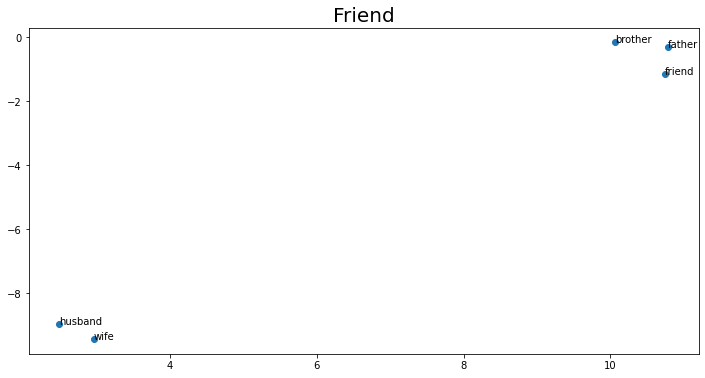

In [12]:
word_test = 'friend'
similars = find_similar_word(emmbed_dict[word_test], 5)
plot_word_embeddings(words=list(similars.keys()), vectors=list(similars.values()), title=word_test.title())

In [13]:
similars.keys()

dict_keys(['friend', 'father', 'wife', 'husband', 'brother'])

# References
- https://en.wikipedia.org/wiki/Word_embedding
- https://ruder.io/word-embeddings-1/
- https://nlp.stanford.edu/projects/glove/
- https://en.wikipedia.org/wiki/Word2vec
- http://insideairbnb.com/get-the-data.html